In [1]:
source('../functions.R')
source('../figure_parameters.R')
seurat = readRDS('Data/soup_output.RDS')

Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.5.3"Loading required package: cowplot
Warning message:
"package 'cowplot' was built under R version 3.5.3"
********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************

Loading required package: Matrix
Warning message:
"package 'feather' was built under R version 3.5.3"Warning message:
"package 'dplyr' was built under R version 3.5.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: viridisLite
Warning message:
"package 'tidyr' was built under R version 3.5.3"
Attaching package: 'tidyr'

The following object

Regressing out: nUMI, percent.mito



Time Elapsed:  4.01237261692683 mins

Scaling data matrix


[1] "PC1"
 [1] "IL2RB"  "CD247"  "IL7R"   "GZMA"   "PRF1"   "TRAT1"  "GATA3"  "CD160" 
 [9] "MYBL1"  "CDHR5"  "ZNF831" "MYO1A"  "CDHR2"  "TIGIT"  "KRT86"  "TRDC"  
[17] "APOA1"  "MATK"   "LTB"    "APOA4"  "GZMH"   "ICOS"   "MUC17"  "APOC3" 
[25] "FAIM3"  "GZMK"   "ZNF683" "GNLY"   "KRT81"  "LCT"   
[1] ""
 [1] "IGLV10-54" "IER3"      "IGHV3-49"  "IGLV1-51"  "GC"        "IGHV1-3"  
 [7] "IGHV3-33"  "IGLV3-1"   "DSP"       "IGLV7-43"  "IGLV2-18"  "A2M"      
[13] "TACSTD2"   "IGKV3-11"  "EMP1"      "IGLV3-25"  "IGLV1-40"  "SOD2"     
[19] "DSG3"      "KRT5"      "AQP3"      "PITX1"     "KRT13"     "DSC3"     
[25] "PGC"       "S100A2"    "ITLN1"     "IGHV3-72"  "SERPINF1"  "SOCS3"    
[1] ""
[1] ""
[1] "PC2"
 [1] "PITX1"      "DSP"        "PKP1"       "S100A16"    "DSG3"      
 [6] "S100A2"     "S100A14"    "KRT13"      "AQP3"       "DSC3"      
[11] "TACSTD2"    "PPL"        "GBP6"       "CALML3"     "CRABP2"    
[16] "LY6D"       "ADH7"       "KRT6A"      "KRT5"       "CLCA2"     
[21]

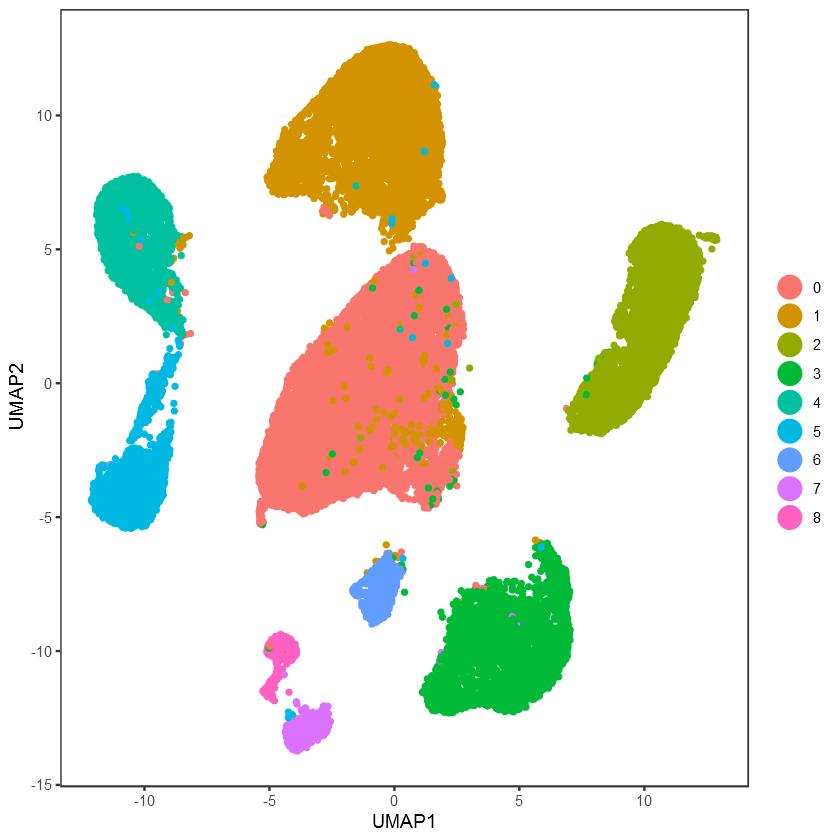

In [3]:
# first, run preprocessing
mito.genes = grep("^MT-", rownames(seurat@data), value = T)
seurat@meta.data$percent.mito = colSums(seurat@data[mito.genes,]/colSums(seurat@data))
seurat@meta.data$nUMI = colSums(seurat@raw.data)
seurat = NormalizeData(seurat)
seurat = FindVariableGenes(seurat, do.plot = FALSE)
seurat = ScaleData(seurat, genes.use = seurat@var.genes, model.use = 'poisson', vars.to.regress = c('nUMI', 'percent.mito'))
seurat = RunPCA(seurat, genes.use = seurat@var.genes, pcs.compute = 50)
seurat = RunUMAP(seurat, dims.use = 1:10)
seurat = FindClusters(seurat, dims.use = 1:10, resolution = .1, print.output = FALSE)

DimPlot(seurat, 'umap')

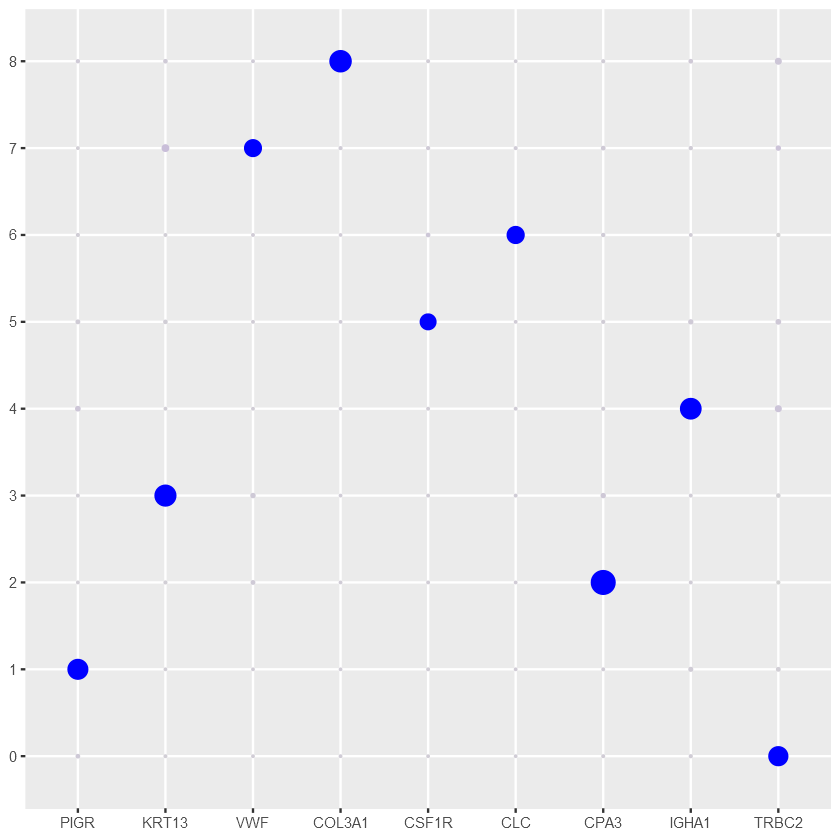

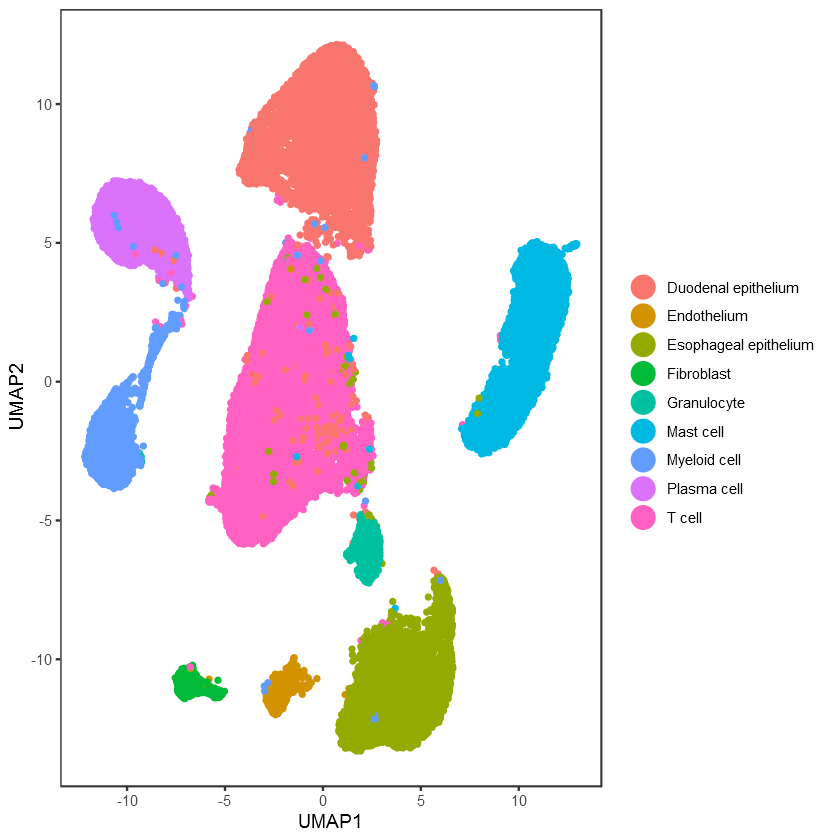

In [7]:
# assign clusters
seurat = SetAllIdent(seurat, 'res.0.3')
DotPlot(seurat,c('TRBC2', 'IGHA1', 'CPA3', 'CLC', 'CSF1R', 'COL3A1', 'VWF', 'KRT13', 'PIGR'))
clusters = levels(seurat@ident)
names(clusters) = c('T cell', 'Duodenal epithelium', 'Mast cell', 'Esophageal epithelium', 'Plasma cell', 'Myeloid cell', 'Granulocyte', 'Endothelium', 'Fibroblast')
seurat@meta.data$phenotype = names(clusters)[seurat@ident]
DimPlot(seurat, 'umap', group.by = 'phenotype')


In [8]:
saveRDS(seurat, '../../Data/tissue_seurat.RDS')